In [67]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import shdom
from scipy.ndimage import center_of_mass


In [68]:
dynamic_medium, dynamic_rte_solver, dynamic_measurements = shdom.load_dynamic_forward_model('experiments/rico52x57x26_velocity_4_3_9img_perspective/dynamic_medium')
medium, rte_solver, measurements = shdom.load_forward_model('../experiments/rico32x37x26_perspective/monochromatic')

In [69]:
def image_preprocessing(image,referance=[0,0]):
    com = center_of_mass(image>0.04)
    shift_x = np.round(image.shape[0] / 2 - com[0]-referance[0]).astype(int)
    shift_y = np.round(image.shape[1] / 2 - com[1]-referance[1]).astype(int)
    out_image = np.roll(image,(shift_x,shift_y))
    return out_image

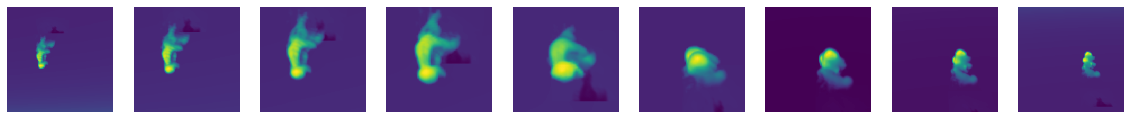

In [70]:
f, axarr = plt.subplots(1, len(dynamic_measurements.images), figsize=(20, 20))
for ax, image in zip(axarr, dynamic_measurements.images):
    ax.imshow(image)
    ax.axis('off')


In [71]:
images=[]
index = np.floor(dynamic_medium.num_mediums/2).astype(int)
middle_im = dynamic_measurements.images[index]
com = center_of_mass(middle_im>0.04)
referance_x = middle_im.shape[0]/2 - com[0]
referance_y = middle_im.shape[1]/2 - com[1]
referance = [referance_x,referance_y]
for image in dynamic_measurements.images:
    images.append(image_preprocessing(image,referance))


# medium = dynamic_medium[index]
print(np.linalg.norm(np.asarray(measurements.images) - np.asarray(images)))
# measurements.images = images
measurements = shdom.Measurements(measurements.camera,images,wavelength=measurements.wavelength)
print(np.linalg.norm(np.asarray(measurements.images) - np.asarray(images)))

9.538963
0.0


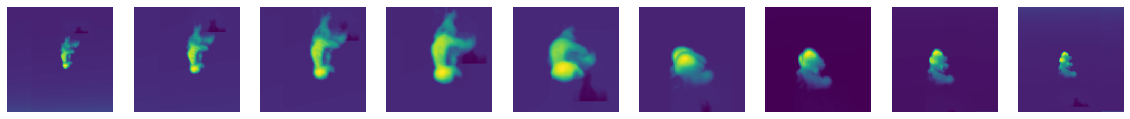

In [72]:
f, axarr = plt.subplots(1, len(measurements.images), figsize=(20, 20))
for ax, image in zip(axarr, measurements.images):
    ax.imshow(image)
    ax.axis('off')

In [73]:
numerical_params = shdom.NumericalParameters()
scene_params = shdom.SceneParameters(
    wavelength=dynamic_medium.wavelength,
    source=shdom.SolarSource(azimuth=65, zenith=135)
)

rte_solver = shdom.RteSolver(scene_params, numerical_params)
rte_solver.set_medium(medium)

In [74]:
output_dir = '../experiments/rico52x57x26_velocity_3_4_9img_perspective_com_preprocessed/monochromatic'
shdom.save_forward_model(output_dir, medium, rte_solver, measurements)
